In [192]:
import pandas as pd
import numpy as np
from utility.util import clean_columns

from matplotlib import pyplot as plt
from utility.util import plot_gender_fraction_over_time

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import os
import string
import zipfile
import shutil

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [101]:
qR = pd.read_csv("./utility/data/Lab 1 Quiz.csv")
# qR.head()

In [102]:
iCare = qR[['question_number','question_title','answers','question_content']]
# iCare.iloc[8]['question_content']
iCare

,question_number,question_title,answers,question_content
0,1.0,What is the one thing you learned from today's...,"{""0"": ""I learned how to clean up a dataset fro...","[{""type"": ""text"", ""value"": ""Turn **off** scree..."
1,2.1,What are the features of the iris dataset? Mar...,"{""0"": [""petal length"", ""petal width"", ""sepal w...","[{""type"": ""select_all_input"", ""choices"": [{""va..."
2,2.2,How many data points are in your training set?,"{""0"": ""105""}","[{""type"": ""text"", ""value"": """"}, {""type"": ""radi..."
3,3.1,Which feature did you use for predictions?,"{""0"": ""We used petal width for the predictions...","[{""type"": ""text"", ""value"": """"}, {""type"": ""free..."
4,3.2,What was the average prediction accuracy for t...,"{""0"": ""The average prediction accuracy was 88....","[{""type"": ""text"", ""value"": """"}, {""type"": ""free..."
...,...,...,...,...
1913,4.4,Briefly justify or explain your choice in 2-3 ...,"{""0"": ""As long as decision making process coul...","[{""type"": ""text"", ""value"": ""Turn **off** scree..."
1914,5.1,How far did you get in today's lab? Select the...,"{""0"": ""D Drawing Conclusions using Machine Lea...","[{""type"": ""text"", ""value"": ""Note: We mark D an..."
1915,5.2,Do you have any prior Python experience?,"{""0"": ""No""}","[{""type"": ""text"", ""value"": ""Note: I will mark ..."
1916,5.3,Did you like today's lab?,"{""0"": ""Yes""}","[{""type"": ""text"", ""value"": ""Note: I will mark ..."


In [70]:
def cleaning_up(df):
    new_df = df
    for i in new_df.index:
#       changing the question content
        answers = new_df.iloc[i]['answers'].replace("0","").translate(str.maketrans("", "", string.punctuation))
        q_content = new_df.iloc[i]['question_content'].replace("0","").translate(str.maketrans("", "", string.punctuation))
        new_df.at[i, 'answers'] = answers
        new_df.at[i, 'question_content'] = q_content
#       changing the answer content
        if "We mark D and E" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "abc_input"
            continue;
        elif "text" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "text"
            continue;
        elif "selectallinput" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "select_all_input"
            continue;
        elif "radioinput" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "radio_input"
            continue;
    return new_df

clean = cleaning_up(iCare)
q_num_cont = clean[["question_number", "question_content"]]
clean[:10]
# %timeit cleaning_up_faster(iCare)


1.1 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.06 s ± 216 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


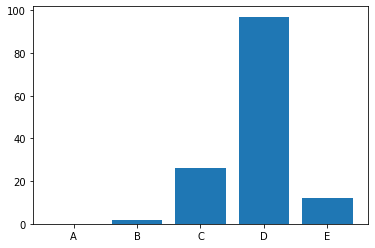

0.0% of people chose A
1.46% of people chose B
18.98% of people chose C
70.8% of people chose D
8.76% of people chose E


In [128]:
def ABC_input (df, q_num):   
    answers = {
        "A" : 0,
        "B" : 0,
        "C" : 0,
        "D" : 0,
        "E" : 0
    }
    count = 0
    for i in df.index:
        if df.iloc[i]['question_number'] == q_num:
            count += 1
            ans = str(df.iloc[i]['answers'])
            goal = ans[1]
            if goal == "A":
                answers["A"] += 1
            elif goal == "B":
                answers["B"] += 1
            elif goal == "C":
                answers["C"] += 1
            elif goal == "D":
                answers["D"] += 1
            elif goal == "E":
                answers["E"] += 1
    #Visual
    lists = sorted(answers.items())
    x, y = zip(*lists)
    plt.bar(x, y)
    plt.show()
    #Numbers
    for a in ['A','B','C','D','E']:
        percent = np.round((answers[a]/count)*100,2)
        print(f'{percent}% of people chose {a}')
                
# ABC_input(clean, 5.1)       

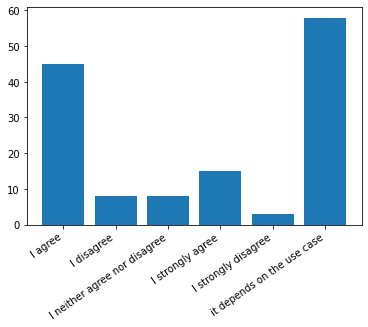

10.95% of people chose "I strongly agree"
32.85% of people chose "I agree"
5.84% of people chose "I neither agree nor disagree"
5.84% of people chose "I disagree"
2.19% of people chose "I strongly disagree"
42.34% of people chose "it depends on the use case"


In [231]:
def radio_input (df, q_num):
    answers = {
        "I strongly disagree" : 0,
        "I disagree" : 0,
        "I neither agree nor disagree" : 0,
        "I agree" : 0,
        "I strongly agree" : 0,
        "it depends on the use case" : 0
    }
    count = 0
    for i in df.index:
        if df.iloc[i]['question_number'] == q_num:
            count += 1
            goal = str(df.iloc[i]['answers'])
            if goal == " I strongly disagree":
                answers["I strongly disagree"] += 1
            elif goal == " I disagree":
                answers["I disagree"] += 1
            elif goal == " I neither agree nor disagree":
                answers["I neither agree nor disagree"] += 1
            elif goal == " I agree":
                answers["I agree"] += 1
            elif goal == " I strongly agree":
                answers["I strongly agree"] += 1
            elif goal == " it depends on the use case":
                answers["it depends on the use case"] += 1
    #visual portion
    lists = sorted(answers.items())
    x, y = zip(*lists)
    plt.bar(x, y)
    plt.xticks(rotation = 35, ha = 'right')
    plt.show()
    #numbers portion
    for ans in ["I strongly agree", "I agree", "I neither agree nor disagree", "I disagree", "I strongly disagree", "it depends on the use case"]:
        percent = np.round((answers[ans]/count)*100,2)
        print(f'{percent}% of people chose \"{ans}\"')
radio_input(clean, 4.1)

In [226]:
def short_answer (df, q_num):
    obj = SentimentIntensityAnalyzer()
    rows = []
    count = 0
    for i in df.index:
        if df.iloc[i]['question_number'] == q_num:
            count += 1
            ans = str(df.iloc[i]['answers'])
            sent_score = obj.polarity_scores(ans)
            rows.append([sent_score['neg'], sent_score['neu'], sent_score['pos'], sent_score['compound'], ans])
#     print(rows)
    scores = pd.DataFrame(rows, columns=["sentiment_score_neg","sentiment_score_neu","sentiment_score_pos","sentiment_score_comp", "response"])
    scores.sort_values(by=['sentiment_score_comp'], inplace=True, ascending=False)
    scores.head()
    return scores[['response']].head()
    
# short_answer(clean, 5.4)

In [232]:
def get_question_nums(df):
    count = 0
    arr = []
    first_num = df.iloc[0]['question_number']
    for index,row in df.iterrows():
        arr.append((f"{df.iloc[index]['question_number']}) {df.iloc[index]['question_title']}",df.iloc[index]['question_number']))
        count += 1
        index = index+1
        if(df.iloc[index]['question_number'] == first_num):
            return arr
            break                 
            
# get_question_nums(clean)

In [228]:
def get_anything (df, q_num):
    pd.set_option('display.max_colwidth', None)
    q_name = df.loc[df['question_number'] == q_num, 'question_title'].iloc[0]
    print(f'{q_num}. {q_name}')
    for i in df.index:
        if df.iloc[i]["question_number"] == q_num:
            if df.iloc[i]["question_content"] == "radio_input":
                radio_input(df, q_num)
                break
            elif df.iloc[i]["question_content"] == "text":
                return short_answer(df, q_num)
                break
            elif df.iloc[i]["question_content"] == "abc_input":
                ABC_input(df, q_num)
                break
            elif df.iloc[i]["question_content"] == "select_all_input":
                print("idk how to do this yet")
                break
# ABC ex 5.1
# text ex 1.0
# select ex 2.1
# radio ex 4.1
# clean is the cleaned dataframe
# get_anything(clean, 5.4)

In [230]:
arr = get_question_nums(clean)
widgets.interact(get_anything, df=fixed(clean), q_num=arr, layout={'width': 'initial'})

interactive(children=(Dropdown(description='q_num', options=(("1.0) What is the one thing you learned from tod…

<function __main__.get_anything(df, q_num)>